# 2. Implement efficiently the Fibonacci computation (recursion)

Voici une implémentation de Fibonacci récursive mais pas optimisée :

In [1]:
def fibo(n):
    assert isinstance(n, int)  , 'n has to be a positive integer'
    assert n>=0 , 'n has to be a positive integer'
    if n <=1:
        return n
    else:
        return fibo(n-1)+fibo(n-2)

In [5]:
print(fibo(30))

832040


Pour implémenter Fibonacci de manière linéaire, il faut éviter de recalculer plusieurs fois des valeurs pour le meme nombre.
Pour cela, on enregistre toutes les valeurs de fibonacci dans une liste pour y accéder facilement.
On augmente cependant la complexité spatiale par la meme occasion (tradeoff entre complexité temporelle et spatiale).

In [3]:
def linear_fibonacci(n):

  # On initialise la liste
  fibs = [0, 1]
  for i in range(2, n+1):
    fibs.append(fibs[-1] + fibs[-2])

  # On retourne la valeur qui nous intéresse (la dernière)
  return fibs[-1]

In [6]:
print(linear_fibonacci(30))

832040


On remarque que la deuxième implémentation est beaucoup plus rapide pour calculer la valeur associée à 30.

# 3. Solve the Arsène Lupin problem (dynamic programming ).

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def max_money(houses):
    assert all([isinstance(house, int) for house in houses]), 'All amount should be integer'
    n = len(houses)
    assert n > 0 , 'No house to rob'
    if n == 1:
        return [houses[0]] , [[0]]
    elif n == 2:
        return [max(houses)] , [[np.argmax(houses)]]
    else:
        amount = [0]*n 
        house_to_rob = [None] *n
        amount[0] = houses[0]
        house_to_rob[0] = [0]

        amount[1] = max(houses[0:2])
        house_to_rob[1] = [np.argmax(houses[0:2])]

        for i in range(2, n):
            if amount[i-2]+houses[i] > amount[i-1]: # if better result wit the new house
                amount[i] = amount[i-2]+houses[i]
                house_to_rob[i] = house_to_rob[i-2]+[i]
            else: # if the result with the new house is not best
                amount[i] = amount[i-1]
                house_to_rob[i] = house_to_rob[i-1]
        return amount,house_to_rob

In [6]:
houses = [2, 1,6,1,1,4]
amount , rob = max_money(houses)
print(amount[-1],rob[-1])

12 [0, 2, 5]


In [7]:
def plot_houses(houses , amount =None , houses_to_rob=None):
    fig, ax = plt.subplots()
    n=len(houses)
    if not amount or not houses_to_rob: #si on utilise change_amount()
        amount,houses_to_rob = max_money(houses)
        amount=amount[-1]
        houses_to_rob = houses_to_rob[-1]

    ax.bar(range(n), houses, color='red',label='pass')
    ax.bar(houses_to_rob[0], houses[houses_to_rob[0]], color='green',label='rob') # duplicate just for good legend
    for i in houses_to_rob[1:]:
        ax.bar(i, houses[i], color='green')
    ax.set_title(f"Houses to rob to get {amount}$")
    ax.set_xlabel("House")
    ax.set_ylabel("Money")
    ax.legend()
    return fig 
 

[31, 46, 38, 73, 13, 80, 65, 60, 3, 88, 30, 32, 43, 22, 85, 31, 84, 47, 74, 31]


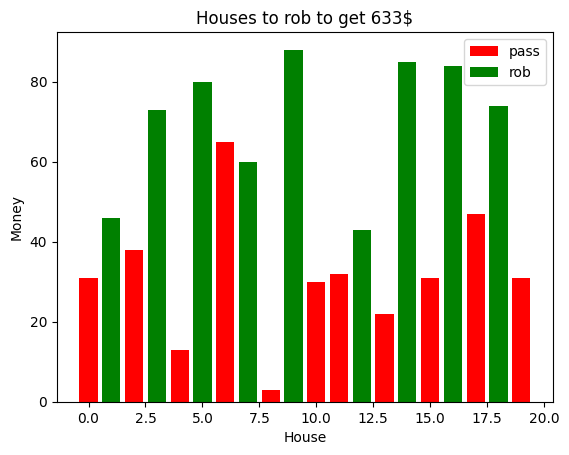

In [9]:
import random

houses = [31, 46, 38, 73, 13, 80, 65, 60, 3, 88, 30, 32, 43, 22, 85, 31, 84, 47, 74, 31]
#[random.randint(0, 90) for i in range(0,50)]
amount , rob = max_money(houses)
print(houses)
fig = plot_houses(houses)

In [10]:
# bonus on change le montant de la maison i sans avoir à tout recalculer
def change_amount(houses,amount,house_to_rob,index,new_val):
    assert all([isinstance(house, int) for house in houses]), 'All amount should be integer'
    n = len(houses)
    assert n > 0 , 'No house to rob'
    if index <= n-3:
        old_ammount  = amount[index+2]
    houses[index] = new_val

    if n == 1:
        return [houses[0]] , [[0]]
    elif n == 2:
        return [max(houses)] , [[np.argmax(houses)]]
    
    if index == 0 or index ==1:
        amount[0] = houses[0]
        house_to_rob[0] = [0]

        amount[1] = max(houses[0:2])
        house_to_rob[1] = [np.argmax(houses[0:2])]

    for i in range(max(index,2),n):
            if amount[i-2]+houses[i] > amount[i-1]:
                amount[i] = amount[i-2]+houses[i]
                house_to_rob[i] = house_to_rob[i-2]+[i]
            else:
                amount[i] = amount[i-1]
                house_to_rob[i] = house_to_rob[i-1]
            if i==index+2:
                 if old_ammount == amount[i]:  #s'il la modification n'a pas fais de nouveau changement 
                    return amount,house_to_rob
    return amount,house_to_rob
                     
                 

        

### App with a GUI (tkinter)

In [ ]:
import tkinter as tk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg


def calculate():
    houses=[]
    for entry in houses_entries: 
        try:
            houses.append(int(entry.get()))
        except:
            pass
    try:
        amount , rob = max_money(houses)
        result_label.config(text=f"Maximum amount: {amount[-1]}")
        result_label2.config(text=f"Index houses to rob : {rob[-1]}")
        fig = plot_houses(houses)
        canvas = FigureCanvasTkAgg(fig, master=root)
        canvas.get_tk_widget().grid(row=1, column=3, columnspan=5,rowspan=10, padx=5, pady=50)

    except ValueError:
        result_label.config(text="Invalid input")



def create_houses():
    global houses_entries
    n = int(n_entry.get())
    if n > 12:
        scrollbar = tk.Scrollbar(root)
        scrollbar.grid(row=1, column=2, rowspan=15, padx=5, pady=5)

    houses_text = tk.Text(root, width=35, height=16, yscrollcommand=scrollbar.set if n > 15 else None)
    houses_text.grid(row=1, column=0, rowspan=15, columnspan=2, padx=5, pady=5)

    if n > 12:
        scrollbar.config(command=houses_text.yview)

    houses_entries = []
    for i in range(n):
        houses_text.insert(tk.END, f"House {i}:")
        entry = tk.Entry(root, width=10)
        entry.insert(0,0)
        houses_text.window_create(tk.END, window=entry)
        houses_text.insert(tk.END, "\n")
        houses_entries.append(entry)
    return houses_entries


root = tk.Tk()
root.title("Houses Robbing (V2)")


n_entry_label = tk.Label(root, text="Enter the number of houses:")
n_entry_label.grid(row=0, column=0, padx=5, pady=5)

n_entry = tk.Entry(root, width=10)
n_entry.grid(row=0, column=1, padx=5, pady=5)



button = tk.Button(root, text="Create Houses", command=create_houses)
button.grid(row=0, column=2, padx=5, pady=5)

button2 = tk.Button(root, text="Calculate", command=calculate)
button2.grid(row= 16, column=0, columnspan=2, padx=5, pady=10)


result_label = tk.Label(root, text="")
result_label.grid(row=17, column=0, columnspan=2, padx=5, pady=10)

result_label2 = tk.Label(root, text="")
result_label2.grid(row=18, column=0, columnspan=2, padx=5, pady=10)

root.mainloop()


In [11]:

# Old version if the first one without the custom amount of houses
import tkinter as tk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

def update():
    houses=[]
    for entry in houses_entries: 
        try:
            houses.append(int(entry.get()))
        except:
            pass
    try:
        amount , rob = max_money(houses)
        result_label.config(text=f"Maximum amount: {amount[-1]}")
        result_label2.config(text=f"Index houses to rob : {rob[-1]}")
        fig = plot_houses(houses)
        canvas = FigureCanvasTkAgg(fig, master=root)
        canvas.get_tk_widget().grid(row=1, column=3, columnspan=5,rowspan=15, padx=5, pady=50)

    except ValueError:
        result_label.config(text="Invalid input")

root = tk.Tk()
root.title("Houses Robbing")

houses_entries = []
for i in range(15):
    label = tk.Label(root, text=f"House {i}:")
    label.grid(row=i, column=0, padx=5, pady=5)
    entry = tk.Entry(root, width=10)
    entry.insert(0,0)
    entry.grid(row=i, column=1, padx=5, pady=5)
    houses_entries.append(entry)

button = tk.Button(root, text="Calculate", command=update)
button.grid(row=i+1, column=0, columnspan=2, padx=5, pady=10)

result_label = tk.Label(root, text="")
result_label.grid(row=i+2, column=0, columnspan=2, padx=5, pady=10)

result_label2 = tk.Label(root, text="")
result_label2.grid(row=i+3, column=0, columnspan=2, padx=5, pady=10)

root.mainloop()

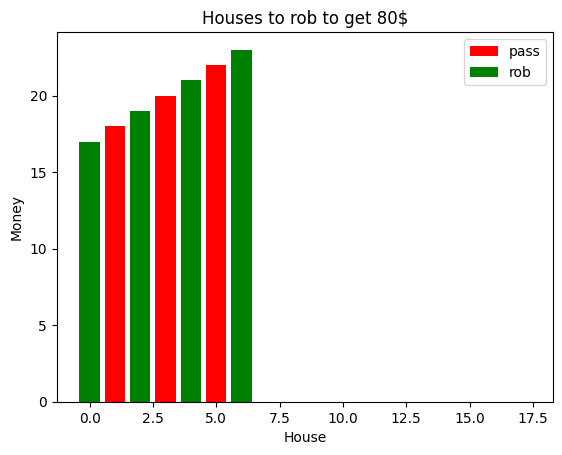

In [12]:
## V2 with custom number of houses
import tkinter as tk

def calculate():
    houses=[]
    for entry in houses_entries: 
        try:
            houses.append(int(entry.get()))
        except:
            pass
    try:
        amount , rob = max_money(houses)
        result_label.config(text=f"Maximum amount: {amount[-1]}")
        result_label2.config(text=f"Index houses to rob : {rob[-1]}")
        fig = plot_houses(houses)
        canvas = FigureCanvasTkAgg(fig, master=root)
        canvas.get_tk_widget().grid(row=1, column=3, columnspan=5,rowspan=10, padx=5, pady=50)

    except ValueError:
        result_label.config(text="Invalid input")



def create_houses():
    global houses_entries
    n = int(n_entry.get())
    if n > 12:
        scrollbar = tk.Scrollbar(root)
        scrollbar.grid(row=1, column=2, rowspan=15, padx=5, pady=5)

    houses_text = tk.Text(root, width=35, height=16, yscrollcommand=scrollbar.set if n > 15 else None)
    houses_text.grid(row=1, column=0, rowspan=15, columnspan=2, padx=5, pady=5)

    if n > 12:
        scrollbar.config(command=houses_text.yview)

    houses_entries = []
    for i in range(n):
        houses_text.insert(tk.END, f"House {i}:")
        entry = tk.Entry(root, width=10)
        entry.insert(0,0)
        houses_text.window_create(tk.END, window=entry)
        houses_text.insert(tk.END, "\n")
        houses_entries.append(entry)
    return houses_entries


root = tk.Tk()
root.title("Houses Robbing")


n_entry_label = tk.Label(root, text="Enter the number of houses:")
n_entry_label.grid(row=0, column=0, padx=5, pady=5)

n_entry = tk.Entry(root, width=10)
n_entry.grid(row=0, column=1, padx=5, pady=5)



button = tk.Button(root, text="Create Houses", command=create_houses)
button.grid(row=0, column=2, padx=5, pady=5)

button2 = tk.Button(root, text="Calculate", command=calculate)
button2.grid(row= 16, column=0, columnspan=2, padx=5, pady=10)


result_label = tk.Label(root, text="")
result_label.grid(row=17, column=0, columnspan=2, padx=5, pady=10)

result_label2 = tk.Label(root, text="")
result_label2.grid(row=18, column=0, columnspan=2, padx=5, pady=10)

root.mainloop()
